<a href="https://colab.research.google.com/github/HosseinEyvazi/Data-visualization/blob/main/Data%20Viz%20%26%20feature%20engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **this notebook contains data viz tutorial + feature engineering**

## The most important viz types :


1.   Bar chart : To plot the frequency of each value
2.   line chart : Visualize Trends Over Time,Track Progress
3.   Histogram (vs bar chart : this is over interval but line chart is on EACH data point)
4.   scatter plot : To find correlation and patterns in multi-variable data (i.e : correlation between some variables).  is very similar to bubble chart . can has got more dimenions (shape and color of scatters)
5.   bubble chart : Has got 2 additional dimesnions (size and color of bubbles)
6.   box plot : To highlight median , quartiles , median


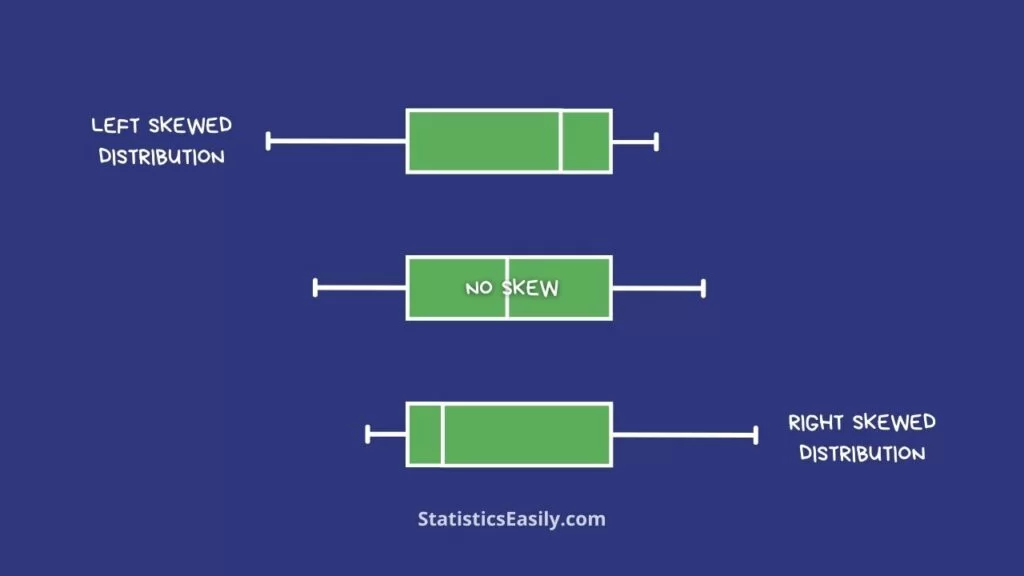


### for data distribution :
for categorical data types : barchart , pie chart(if number of unique values LTE 4)  \
for numeric-continouses : histogram , boxplot \
for numeric-discerete : histogram , bar chart

### for to show the changes of a variable over time :
* line chart  


import

In [ ]:
! pip install ucimlrepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo

# interactives :
import plotly.express as px
import bokeh.plotting as bp
from sklearn.preprocessing import OneHotEncoder


In [ ]:

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [ ]:
df = pd.DataFrame(X)
df_t = pd.DataFrame(y)
df = pd.concat([df_t , df] , axis=1) # don't forget axis =1
df.head()

,income,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,<=50K,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,<=50K,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,<=50K,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,<=50K,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,<=50K,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [ ]:
df.shape

(48842, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   income          48842 non-null  object
 1   age             48842 non-null  int64 
 2   workclass       47879 non-null  object
 3   fnlwgt          48842 non-null  int64 
 4   education       48842 non-null  object
 5   education-num   48842 non-null  int64 
 6   marital-status  48842 non-null  object
 7   occupation      47876 non-null  object
 8   relationship    48842 non-null  object
 9   race            48842 non-null  object
 10  sex             48842 non-null  object
 11  capital-gain    48842 non-null  int64 
 12  capital-loss    48842 non-null  int64 
 13  hours-per-week  48842 non-null  int64 
 14  native-country  48568 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.describe(include="all")

,income,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
count,48842,48842.000000,47879,4.884200e+04,48842,48842.000000,48842,47876,48842,48842,48842,48842.000000,48842.000000,48842.000000,48568
unique,4,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42
top,<=50K,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States
freq,24720,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832
mean,NaN,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN
std,NaN,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN
min,NaN,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN
25%,NaN,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN
50%,NaN,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN
75%,NaN,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN


In [ ]:
df.nunique()

,0
income,4
age,74
workclass,9
fnlwgt,28523
education,16
education-num,16
marital-status,7
occupation,15
relationship,6
race,5


In [ ]:
df['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [ ]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)

In [ ]:
df.isnull().sum()

,0
income,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0


In [ ]:
df = df.fillna(method='ffill')
df.isnull().sum().sum()

<ipython-input-236-35a3f3263bae>:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



0

In [ ]:
df.duplicated().sum()

29

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum().sum()

0

# Data viz

## Line chart
Proper for :


1.   usually the x axis is showing date , time , sequence , ...
2.   distribution of continous numeric datas  



line chart using pandas

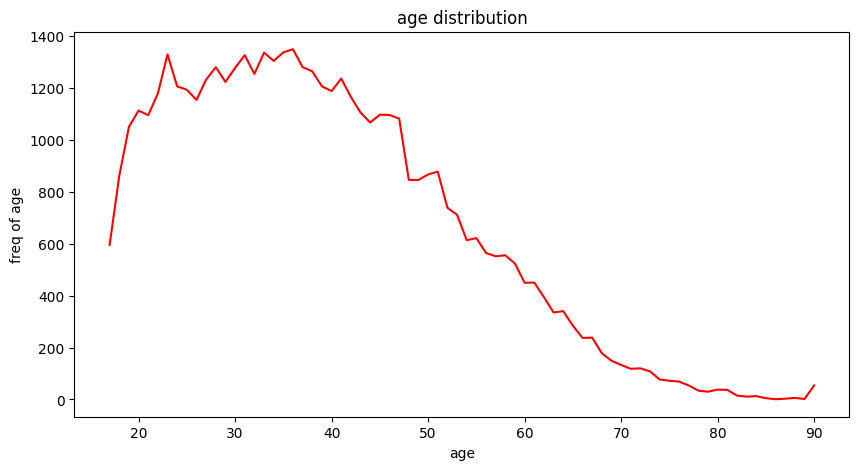

In [ ]:
df_age = df['age'].value_counts().sort_index(ascending=False)
df_age.plot.line(figsize=(10,5) , color='red')
# plt.plot(c='red')   #this line make an override on plot
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('freq of age')
plt.show()
# df['age'].value_counts().sort_index(ascending=False).plot(kind="line" , figsize=(10,5))   # this is equal to above line


line chart using plot \
note : sns and pandas are compatible with matplotlib

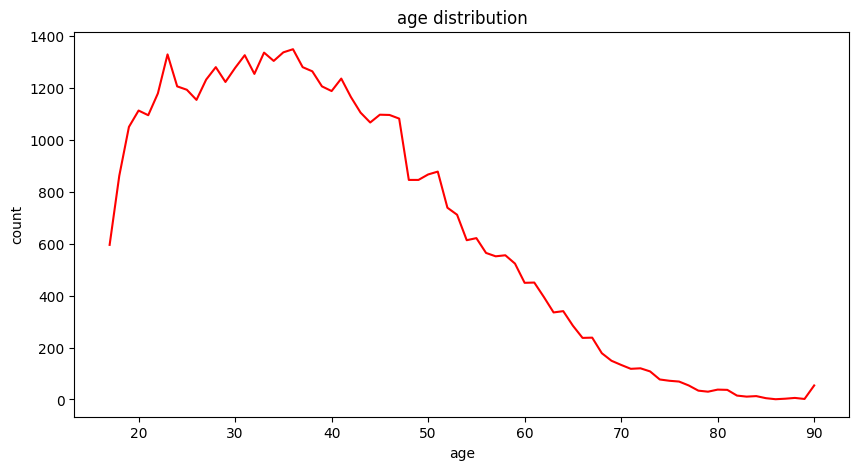

In [ ]:

plt.figure(figsize=(10,5))  # u should write this line before all lines about the plot
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('count')
plt.plot(df_age , c='r')  # plt.plot is specific for line chart
plt.show()


line chart using seaborn \
note : plt.plot(c='red')      # u can't use this method for sns or pandas !!!!

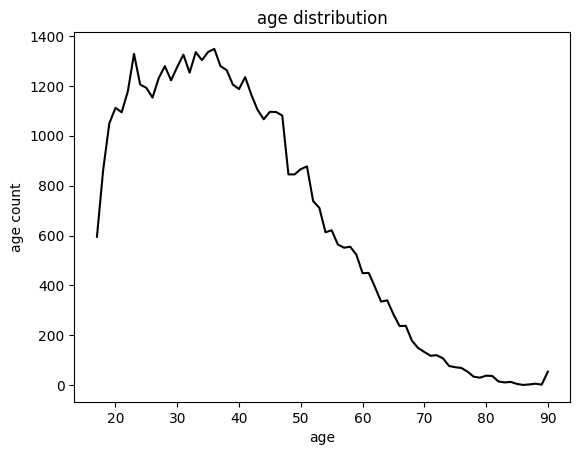

In [ ]:
sns.lineplot(df_age , c="black")
# plt.plot(c='red')      # u can't use this method for sns or pandas !!!!
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('age count')
plt.show()



using plotly

In [ ]:
fig = px.line(df_age)
fig.update_layout(title='age distribution')
#px.line(df_age , x=df_age.index , y=df_age) u can customize the x and y coordinate content
fig.update_traces(hovertemplate = " <i>Age</i> <br> <b>frequency</b> ")
fig.show()



using bokeh

In [ ]:
#...

## Bar chart     
 \
for discrete datas is very similar to to line chart

bar with matplotlib

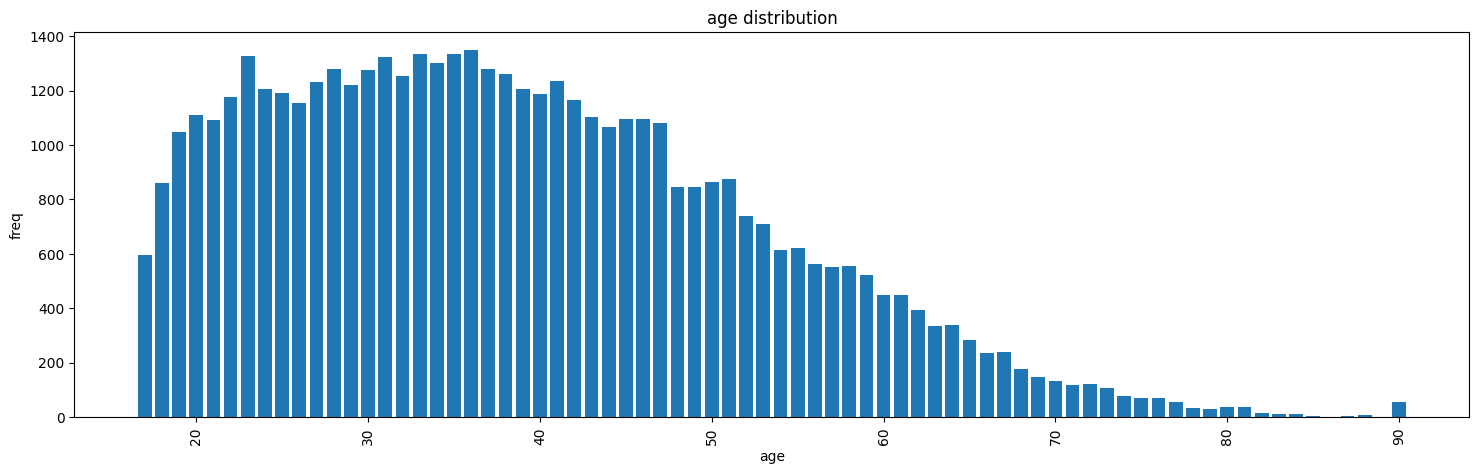

In [ ]:
plt.figure(figsize=(18,5))
plt.bar(df_age.index ,df_age.values )
plt.xticks(rotation=90)
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('freq')
plt.show()

bar with sns

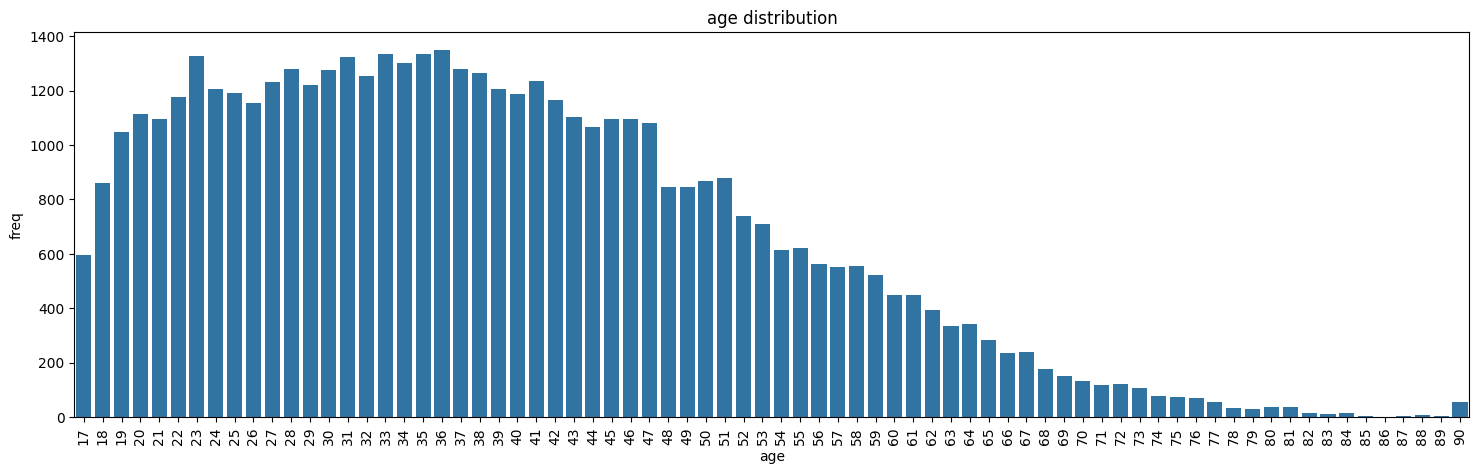

In [ ]:
plt.figure(figsize=(18,5))
sns.barplot(df_age) # is sns compatible with matplotlib
plt.xticks(rotation=90)
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('freq')
plt.show()


bar with pandas

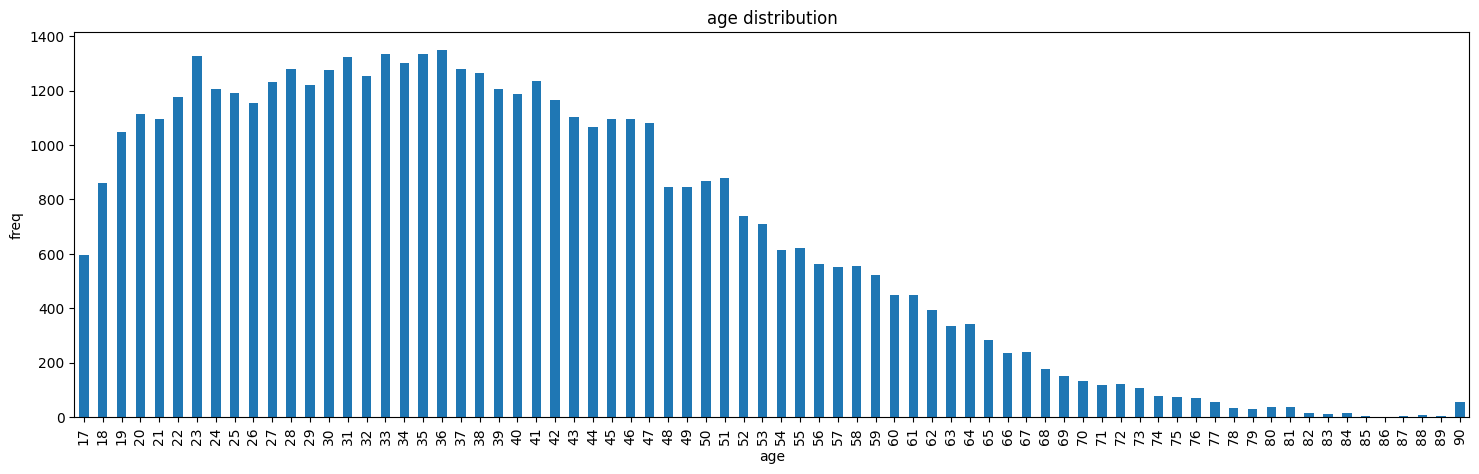

In [ ]:
plt.figure(figsize=(18,5))
df_age.sort_index(ascending=True).plot.bar()
plt.xticks(rotation=90)
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('freq')
plt.show()


## Histogram

histogram with bins=1 is equal to bar chart

## pie chart vs bar chart      
\
we have to use pie chart when the unique values is at most 4  \
in bottom cell result of pie chart is not distinctable for human , unlike bar chart

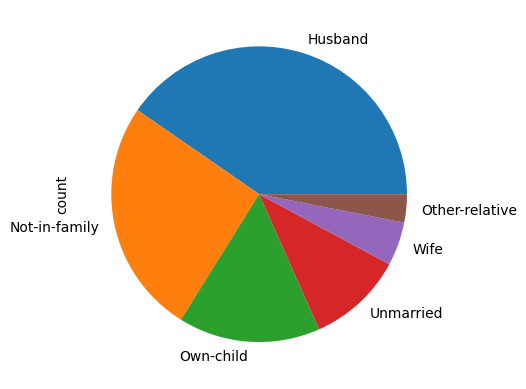

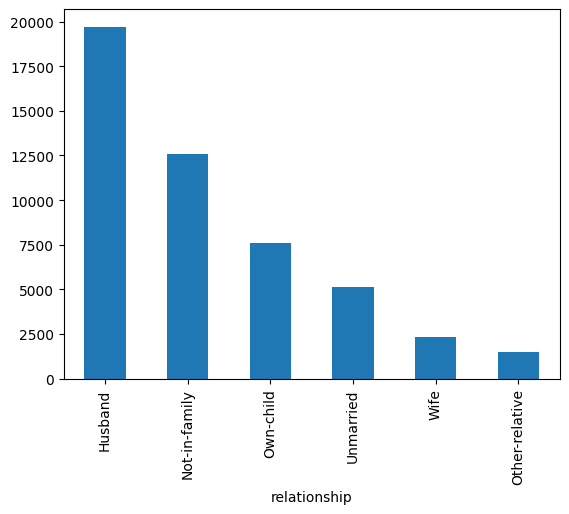

In [ ]:
df['relationship'].value_counts().plot(kind='pie')
plt.show()
df['relationship'].value_counts().plot(kind='bar')
plt.show()

## Adding text on bar chart in matplotlib

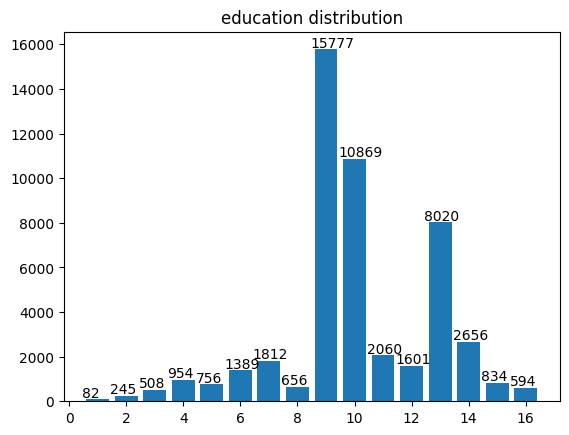

In [ ]:
ed_freq = df['education-num'].value_counts().sort_index()
bars = plt.bar(ed_freq.index ,ed_freq.values )
plt.title('education distribution')
for bar in bars:
  plt.text(s=bar.get_height() , x=bar.get_x()-bar.get_width()/5 , y=bar.get_height()+100 )

## scatter plot to show correlation between 2 columns

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
df_data =pd.DataFrame( data=iris.data ,
              columns = iris.feature_names,
              )
df_target= pd.DataFrame(data=iris.target , columns=['target'])
df_iris = pd.concat( [df_data, df_target] , axis=1)
df_iris.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
43,5.0,3.5,1.6,0.6,0
67,5.8,2.7,4.1,1.0,1
142,5.8,2.7,5.1,1.9,2
131,7.9,3.8,6.4,2.0,2
88,5.6,3.0,4.1,1.3,1
15,5.7,4.4,1.5,0.4,0
41,4.5,2.3,1.3,0.3,0
128,6.4,2.8,5.6,2.1,2
36,5.5,3.5,1.3,0.2,0
34,4.9,3.1,1.5,0.2,0


we can add dimension in plots using : color , bubble size , adding a coordinate ,...

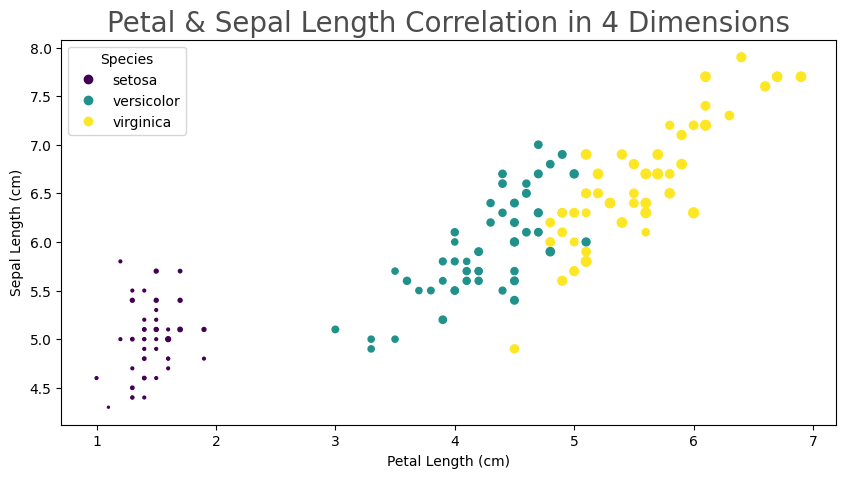

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

# Assuming you loaded the Iris dataset correctly
iris = datasets.load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Mapping target integers to their names
target_names = iris.target_names

plt.figure(figsize=(10, 5))
scatter = plt.scatter(df_iris['petal length (cm)'], df_iris['sepal length (cm)'], c=iris.target, cmap='viridis' , s=df_iris['petal width (cm)']*20)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Sepal Length (cm)')

# Create legend using the target names
legend_labels = target_names

handles, _ = scatter.legend_elements()
plt.legend(handles, legend_labels, title="Species")

plt.title('Petal & Sepal Length Correlation in 4 Dimensions', fontsize=20, alpha=0.7)
plt.show()


Subplot

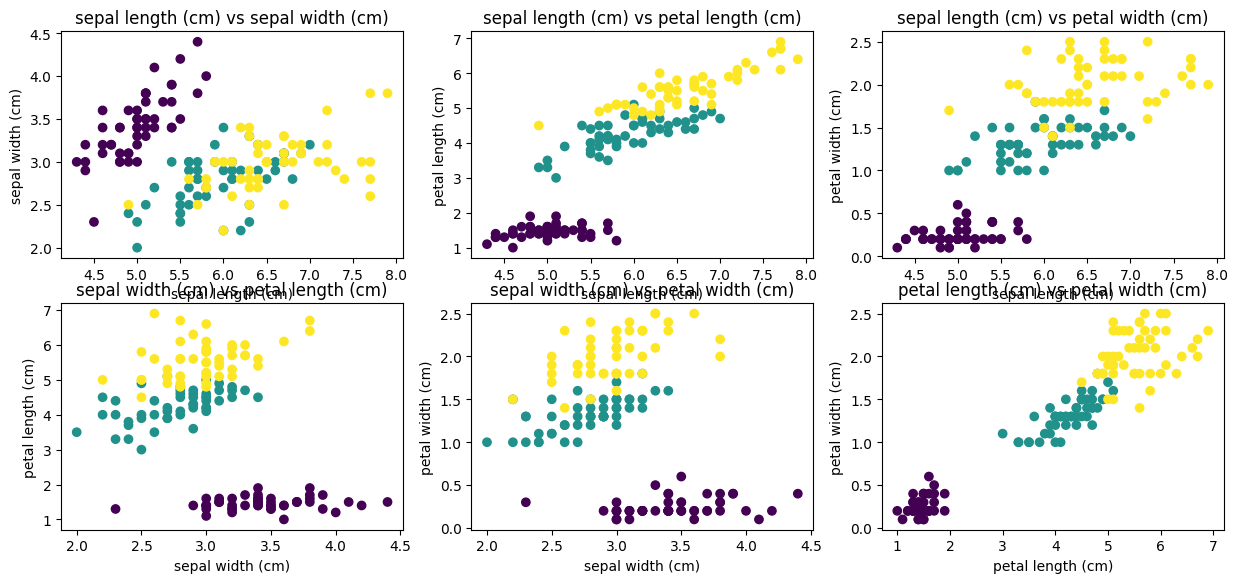

In [ ]:
import itertools
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

# Load the data
iris = datasets.load_iris()
df_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Create a new figure
fig = plt.figure(figsize=(15, 10))

# Get all combinations of two columns
combs = itertools.combinations(df_data.columns, 2)

# Iterate through combinations and plot
for i, (x_col, y_col) in enumerate(combs):
    # Create subplots with a fixed grid size. Adjust accordingly.
    fig.add_subplot(3, 3, i + 1)  # For example, a 3x2 grid
    plt.scatter(df_data[x_col], df_data[y_col] , c=iris.target)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'{x_col} vs {y_col}')

# Display the plot
# plt.tight_layout()  # Adjusts subplots to fit in figure area.
plt.show()



# Feature Engineering :


Defination : to process of tranforming raw data into meaningful fetures that enhance model performance . \

needs domain knowledge \

# why is feature engineering important ?
accuracy , predictive power  \
make data more understandable \
enable insights

# Feature engineering Workflow ?


1.   understand the problem domain
1.   explore and preprocess data
2.   genearate features
3.   select and evaluate features (evaluation based on model accuracy and correlation and ...)
2.   ITERATE and improve

# Feature engineering in Machine learning
`
1.   Transformation (log , sqrt , polynomial transformation (adding power))
2.   interactions : combining features to capture relationships (e.g . price* quantity )
3.   Domain specific feature (e.g. TF-IDF in text analysis)
4.   Feature selection : PCA , Lasso , RFE
5.   check model perfomance after above actions

# Techniques for Generating features


1.   Lag features
2.   Rolling statistics : [moving averages](https://monica.im/share/chat?shareId=COGiKjdzwCsMPmhG) , [rolling](https://monica.im/share/chat?shareId=q6cx8uNxbXhad1VV)
3.   cyclical encoding : handling cyclical features like time (Sine Encoding	, Cosine Encoding)
4.   one hot encoding
5.   bining : (e.g. age 12 to 16 in a bine and so on (age group))

# Best practice in feature engineering
1.   understand the data
2.   start simple (basic transformations)
3.   iterate and validate
note : Avoid leakage : in time series datas you cant set test data from interval . therefore you cant shuffle
4.   Domain knowldge


# Advanced feature engineering techniques
1.   Dimensionality reduction : PCA , t-SNE , auto encoders
2.   Embedding technique (Word2Vec , embedding in neural networks)
3.   Synthetic features
4.   feature selection algorithms : L1 regularization , mutual information.





# YFinance

In [ ]:
import yfinance as yf
import pandas as pd
# Define the ticker symbol
ticker_symbol = "MSFT"

# Create a Ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch historical market data for the last 30 days
data = ticker.history(period="5y")  # data for the last month
# .unique()
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-26 00:00:00-05:00,151.005542,152.126868,150.852194,152.069366,14520600,0.0,0.0
2019-12-27 00:00:00-05:00,152.816881,152.912727,151.638053,152.347275,18412800,0.0,0.0
2019-12-30 00:00:00-05:00,152.376009,152.404760,150.210016,151.034241,16348400,0.0,0.0
2019-12-31 00:00:00-05:00,150.248359,151.206759,149.941664,151.139664,18369400,0.0,0.0
2020-01-02 00:00:00-05:00,152.174765,154.043642,151.743487,153.938217,22622100,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-18 00:00:00-05:00,451.320007,452.649994,437.019989,437.390015,24444500,0.0,0.0
2024-12-19 00:00:00-05:00,441.619995,443.179993,436.320007,437.029999,22963700,0.0,0.0
2024-12-20 00:00:00-05:00,433.109985,443.739990,428.630005,436.600006,64263700,0.0,0.0


In [ ]:
data.index # this equal to data.Date because in this table Date is index feature

DatetimeIndex(['2019-12-26 00:00:00-05:00', '2019-12-27 00:00:00-05:00',
               '2019-12-30 00:00:00-05:00', '2019-12-31 00:00:00-05:00',
               '2020-01-02 00:00:00-05:00', '2020-01-03 00:00:00-05:00',
               '2020-01-06 00:00:00-05:00', '2020-01-07 00:00:00-05:00',
               '2020-01-08 00:00:00-05:00', '2020-01-09 00:00:00-05:00',
               ...
               '2024-12-11 00:00:00-05:00', '2024-12-12 00:00:00-05:00',
               '2024-12-13 00:00:00-05:00', '2024-12-16 00:00:00-05:00',
               '2024-12-17 00:00:00-05:00', '2024-12-18 00:00:00-05:00',
               '2024-12-19 00:00:00-05:00', '2024-12-20 00:00:00-05:00',
               '2024-12-23 00:00:00-05:00', '2024-12-24 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=1258, freq=None)

In [ ]:
data['day_of_week']=data.index.day_name()
data['day_of_week']

,day_of_week
Date,
2019-12-26 00:00:00-05:00,Thursday
2019-12-27 00:00:00-05:00,Friday
2019-12-30 00:00:00-05:00,Monday
2019-12-31 00:00:00-05:00,Tuesday
2020-01-02 00:00:00-05:00,Thursday
...,...
2024-12-18 00:00:00-05:00,Wednesday
2024-12-19 00:00:00-05:00,Thursday
2024-12-20 00:00:00-05:00,Friday


In [ ]:
data['day_of_week'].value_counts()

,count
day_of_week,
Tuesday,260
Wednesday,258
Thursday,255
Friday,252
Monday,233


In [ ]:
print('this is the seasons')
data.index.quarter

this is the seasons


Index([4, 4, 4, 4, 1, 1, 1, 1, 1, 1,
       ...
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
      dtype='int32', name='Date', length=1258)

In [ ]:
data['Month'] = data.index.month.value_counts().sort_values()

In [ ]:
data['Month'] = data.index.month
data['Quarter'] = data.index.month

,Volume
count,1.258000e+03
mean,2.864957e+07
std,1.272276e+07
min,7.164500e+06
25%,2.049260e+07
50%,2.548105e+07
75%,3.290642e+07
max,9.701270e+07


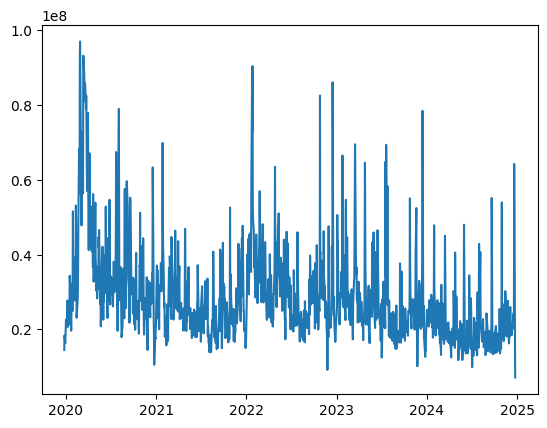

In [ ]:

plt.plot(data.index , data.Volume)
data.Volume.quantile(.5)
data.Volume.describe()

pd.cut -> to convert numeric features to categorical \
 (this is not recommended in machine learning because most of machine learning algorithms can't work with categorical features)

In [ ]:
data['volume_relative_to_mean'] = pd.cut(data['Volume'] ,
                                         bins = [0,data['Volume'].mean() ,float('inf')] ,
                                         labels = ['lower than mean' , 'higher than mean'])



data['volume_relative_to_mean'].sample(5 , random_state=1).sort_index()

,volume_relative_to_mean
Date,
2021-03-09 00:00:00-05:00,higher than mean
2022-02-28 00:00:00-05:00,higher than mean
2023-08-29 00:00:00-04:00,lower than mean
2023-10-23 00:00:00-04:00,lower than mean
2023-12-29 00:00:00-05:00,lower than mean


In [ ]:
# to check it's Bullish or Bearish
data['market_direction']= pd.cut(data['Close'] - data['Open'] ,
                                 bins=[-float('inf') , 0 , float('inf')] ,
                                 labels=['Bearish' , 'Bullish'])
data['market_direction'].value_counts()


,count
market_direction,
Bullish,671
Bearish,587


In [ ]:
import numpy as np
pp = pd.DataFrame([] , columns=['tst'])
data['5day avg close'] = data['Close'].rolling(3).mean() # u have to run an agg method on rolling method
data['5day avg close']


,5day avg close
Date,
2019-12-26 00:00:00-05:00,NaN
2019-12-27 00:00:00-05:00,NaN
2019-12-30 00:00:00-05:00,151.816961
2019-12-31 00:00:00-05:00,151.507060
2020-01-02 00:00:00-05:00,152.037374
...,...
2024-12-18 00:00:00-05:00,447.813334
2024-12-19 00:00:00-05:00,442.960002
2024-12-20 00:00:00-05:00,437.006673


one hot encoding \
note : most of ML models coudn't understand non-numeric features . we have to convert them

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Create OneHotEncoder instance
one_hot_encoding = OneHotEncoder()

# Fit and transform the 'market_direction' column
encoded_array = one_hot_encoding.fit_transform(data[['market_direction']])

# Convert the encoded array to a DataFrame
encoded_df = pd.DataFrame(
    encoded_array.toarray(),
    columns=one_hot_encoding.get_feature_names_out(['market_direction']),
    index=data.index  # Keep the original index
)

data = data.drop('market_direction', axis=1)
data = pd.concat( [encoded_df , data ], axis=1)
data

,market_direction_Bearish,market_direction_Bullish,Open,High,Low,Close,Volume,Dividends,Stock Splits,day_of_week,Month,Quarter,volume_relative_to_mean,5day avg close
Date,,,,,,,,,,,,,,
2019-12-26 00:00:00-05:00,0.0,1.0,151.005542,152.126868,150.852194,152.069366,14520600,0.0,0.0,Thursday,12,12,lower than mean,NaN
2019-12-27 00:00:00-05:00,1.0,0.0,152.816881,152.912727,151.638053,152.347275,18412800,0.0,0.0,Friday,12,12,lower than mean,NaN
2019-12-30 00:00:00-05:00,1.0,0.0,152.376009,152.404760,150.210016,151.034241,16348400,0.0,0.0,Monday,12,12,lower than mean,151.816961
2019-12-31 00:00:00-05:00,0.0,1.0,150.248359,151.206759,149.941664,151.139664,18369400,0.0,0.0,Tuesday,12,12,lower than mean,151.507060
2020-01-02 00:00:00-05:00,0.0,1.0,152.174765,154.043642,151.743487,153.938217,22622100,0.0,0.0,Thursday,1,1,lower than mean,152.037374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-18 00:00:00-05:00,1.0,0.0,451.320007,452.649994,437.019989,437.390015,24444500,0.0,0.0,Wednesday,12,12,lower than mean,447.813334
2024-12-19 00:00:00-05:00,1.0,0.0,441.619995,443.179993,436.320007,437.029999,22963700,0.0,0.0,Thursday,12,12,lower than mean,442.960002
2024-12-20 00:00:00-05:00,0.0,1.0,433.109985,443.739990,428.630005,436.600006,64263700,0.0,0.0,Friday,12,12,higher than mean,437.006673
